In [11]:
import matplotlib.pyplot as plt
import numpy as np

from skimage.data import astronaut
from skimage.color import rgb2gray
from skimage.filters import sobel
from skimage.segmentation import felzenszwalb, slic, quickshift, watershed
from skimage.segmentation import mark_boundaries
from skimage.util import img_as_float
import cv2

import scipy.io as sio
import os

In [53]:
def load_dim_red(image, var):

    # data_path = os.path.join(os.getcwd(),'dim_red/PCA/')
    data_path = os.path.join(os.getcwd(),'dim_red/C2/')

    # y = sio.loadmat(os.path.join(data_path, ''.join([image, '_PCA.mat'])))[var]
    y = sio.loadmat(os.path.join(data_path, ''.join([image, '_clustered.mat'])))[var]

    return y

def load_dim_red_KPCA(image, var):

    data_path = os.path.join(os.getcwd(),'dim_red/KPCA/')
    y = sio.loadmat(os.path.join(data_path, ''.join([image, '_KPCA.mat'])))[var]
    
    return y

def save_segmented(image_name, seg_image, path):

    # data_path = os.path.join(os.getcwd(),'graphs\\felzenszwalb')
    data_path = os.path.join(os.getcwd(), path)

    sio.savemat(os.path.join(data_path, image_name), {"y": seg_image})


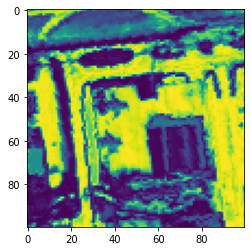

In [387]:
# dataset_name = 'abu-airport-4'
# dataset_name = 'abu-beach-4'
dataset_name = 'abu-airport-2'

# y = load_dim_red(dataset_name, 'cbad_out')
y = load_dim_red_KPCA(dataset_name, 'Y')

y_rgb = np.transpose([y,y,y], (1,2,0))
# plt.imshow(y_rgb[:,:,1])
plt.imshow(y)

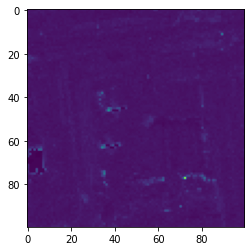

In [385]:
y = load_dim_red(dataset_name, 'cbad_out')
y_rgb = np.transpose([y,y,y], (1,2,0))
plt.imshow(y)

Number of Superpixels QS: 7075


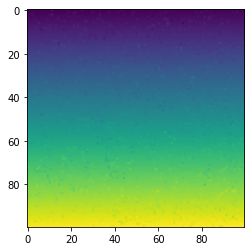

In [377]:
segments_qs = quickshift(y_rgb, ratio=0.15, kernel_size=7, max_dist=4)

S = len(np.unique(segments_qs))
print('Number of Superpixels QS:', S)

plt.imshow(segments_qs)

In [390]:
segments_fz = felzenszwalb(y, scale=10, sigma=0.9, min_size=25)

# S = len(np.unique(segments_fz))
# print('Number of Superpixels FZ:', S)

# plt.imshow(segments_fz)

In [391]:
segments_ws = watershed(y, markers=100)

# S = len(np.unique(segments_ws))
# print('Number of Superpixels WS:', S)

In [368]:
# filename_save = ''.join([dataset_name, '_S', str(S), '_Felz.mat'])
filename_save_QS = ''.join([dataset_name, '_qs.mat'])
filename_save_FZ = ''.join([dataset_name, '_fz.mat'])
filename_save_WS = ''.join([dataset_name, '_ws.mat'])

save_segmented(filename_save_QS, segments_qs, 'segmented/quickshift_KPCA/')
save_segmented(filename_save_FZ, segments_fz, 'segmented/felzenszwalb_KPCA/')
save_segmented(filename_save_WS, segments_ws, 'segmented/watershed_KPCA/')

# save_segmented(filename_save_QS, segments_qs, 'segmented/quickshift_C2/')
# save_segmented(filename_save_FZ, segments_fz, 'segmented/felzenszwalb_C2/')
# save_segmented(filename_save_WS, segments_ws, 'segmented/watershed_C2/')

In [83]:
# plt.imshow(y)